<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/PR%C3%81CTICA_Pr%C3%A1ctica_Validaci%C3%B3n%2C_Evaluaci%C3%B3n_y_Selecci%C3%B3n%2C_263349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE:** LUIS OTILIO ZÚÑIGA PRÓSPERO **MATRICULA:** 263349

# **PRÁCTICA:** Práctica: Validación, Evaluación y Selección

**OBJETIVO:** Aplicar de forma integral el proceso de entrenamiento, ajuste y evaluación de un clasificador tipo Árbol de Decisión sobre un conjunto de datos grande, aplicando técnicas robustas de validación cruzada y optimización de hiperparámetros.

Usa el conjunto de datos Glioma Grading Clinical and Mutation Features. Este conjunto de datos lo puedes encontrar en https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

### **1. Carga de Bibliotecas, Conjunto de Datos y Análisis Exploratorio de los Datos**

- Declarar las bibliotecas necesarias para este proyecto
- Cargar el conjunto de datos Glioma Grading Clinical and Mutation Features. Se puede descargar de https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset

In [ ]:
# Se importan las bibliotecas necesarias para el análisis de datos y visualización.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV, GridSearchCV

# Se configura el estilo general de las gráficas.
sns.set_theme(style="whitegrid", palette="inferno")

# Se guarda la paleta de colores seleccionada para utilizarla de forma consistente en las gráficas posteriores.
palette = sns.color_palette("inferno")

# Se definen algunos colores específicos que pueden reutilizarse en gráficas individuales.
color_principal = palette[0]
color_secundario = palette[1]
color_terciario = palette[2]

# Se monta Google Drive para acceder a los archivos almacenados en la cuenta.
from google.colab import drive
drive.mount('/content/drive')

# Se define la ruta del archivo CSV dentro de Google Drive.
ruta_csv = 'drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SEMANA 14/TCGA_InfoWithGrade.csv'

# Se lee el archivo CSV y se carga en un DataFrame de pandas.
df = pd.read_csv(ruta_csv)

# Se verifica que el conjunto de datos se haya cargado correctamente mostrando las primeras filas.
print("Primeras filas del conjunto de datos:")
display(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del conjunto de datos:


,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**OBSERVACIONES PARTE 1:** En esta primera parte se importan las bibliotecas necesarias para trabajar con datos y generar visualizaciones, y se establece una paleta de colores que se usará en todas las gráficas del proyecto para mantener consistencia visual. Posteriormente, se monta Google Drive para acceder al archivo que contiene el conjunto de datos TCGA_InfoWithGrade, el cual incluye características clínicas y genéticas asociadas al diagnóstico de gliomas. Finalmente, se carga el archivo CSV en un DataFrame y se muestran las primeras filas para verificar que la lectura se realizó correctamente y confirmar que la estructura del dataset es adecuada para iniciar el análisis posterior.

### **2. 📊 Análisis exploratorio de datos (EDA)**

Realiza un análisis inicial de los datos antes de modelar:

- Describir forma y estructura (shape, describe(), info()).
- Mostrar la distribución de clases (y.value_counts()).
- Visualizar:
  - Histograma de al menos 3 variables numéricas.
  - Boxplots o violin plots por clase si es computacionalmente viable.
  - Mapa de calor de correlaciones entre variables.

🧠 Reflexiona:

- ¿Existen clases desbalanceadas?
- ¿Qué atributos parecen más informativos?

Forma del DataFrame (filas, columnas):
(839, 24)

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1   

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,...,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000
mean,0.419547,0.418355,50.935411,0.107271,0.481526,0.414779,0.258641,0.168057,0.133492,0.132300,...,0.053635,0.047676,0.045292,0.034565,0.032181,0.032181,0.032181,0.027414,0.027414,0.026222
std,0.493779,0.493583,15.702339,0.369392,0.499957,0.492978,0.438149,0.374140,0.340309,0.339019,...,0.225431,0.213206,0.208068,0.182784,0.176586,0.176586,0.176586,0.163383,0.163383,0.159889
min,0.000000,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,38.055000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,51.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,62.800000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,89.290000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Distribución de clases en la variable objetivo (Grade):
Grade
0    487
1    352
Name: count, dtype: int64


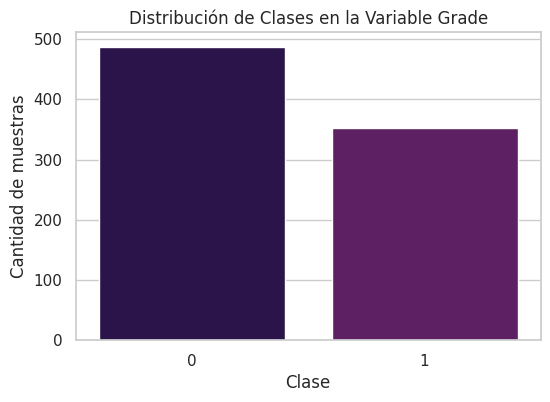

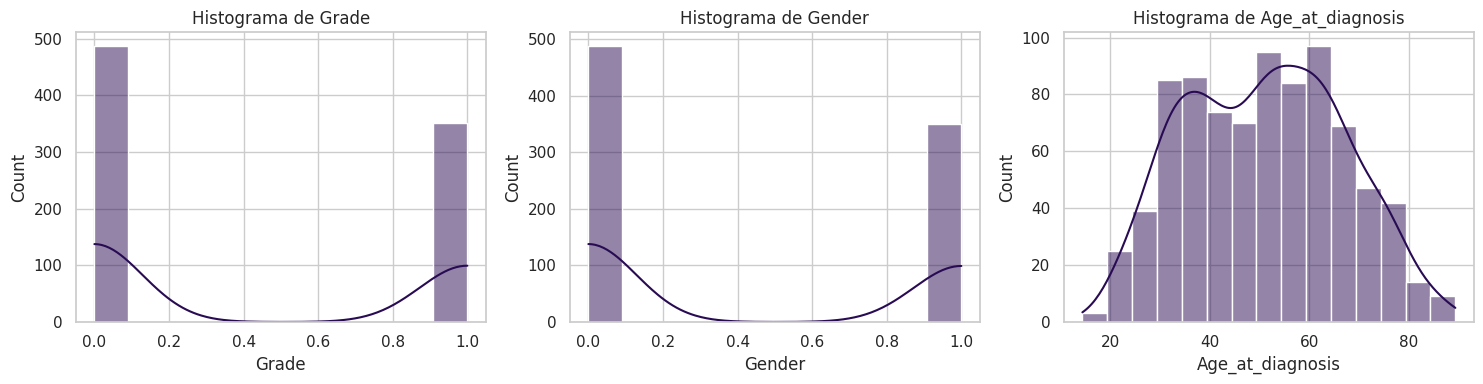

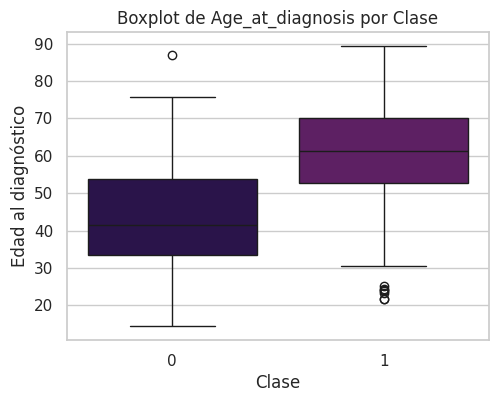

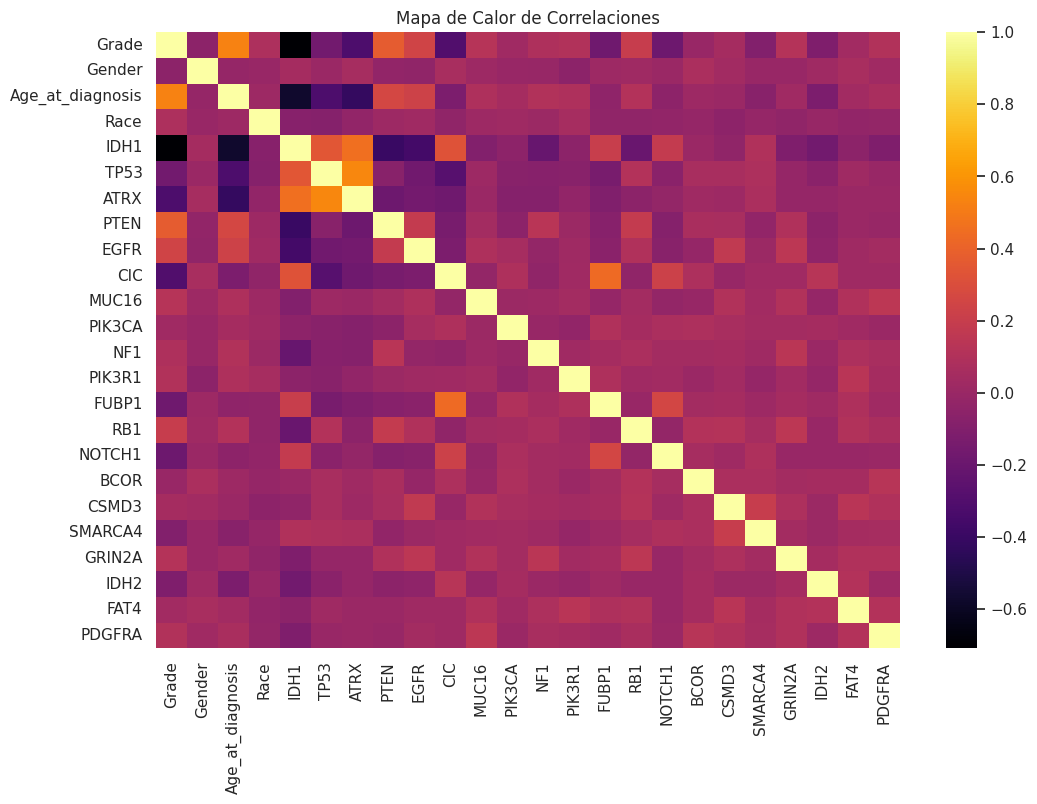

In [ ]:
# Se revisa la forma del DataFrame para conocer cuántas observaciones y cuántas variables contiene.
print("Forma del DataFrame (filas, columnas):")
print(df.shape)

# Se revisa la estructura general del DataFrame para identificar tipos de datos y valores faltantes.
print("\nInformación general del DataFrame:")
df.info()

# Se genera un resumen estadístico de las variables numéricas para identificar rangos y tendencias generales.
print("\nResumen estadístico de las variables numéricas:")
display(df.describe())

# Se revisa la distribución de clases para identificar si existe desbalance entre Low Grade y High Grade.
print("\nDistribución de clases en la variable objetivo (Grade):")
print(df['Grade'].value_counts())

# Se crea una gráfica de barras para visualizar la proporción de cada clase.
plt.figure(figsize=(6,4))

# Se utiliza una paleta con solo dos colores para evitar la advertencia de valores extra en la paleta.
sns.countplot(
    data=df,
    x='Grade',
    hue='Grade',
    palette=[color_principal, color_secundario],
    legend=False
)

plt.title("Distribución de Clases en la Variable Grade")
plt.xlabel("Clase")
plt.ylabel("Cantidad de muestras")
plt.show()

# Se seleccionan tres variables numéricas representativas para visualizar su distribución.
columnas_hist = df.select_dtypes(include=np.number).columns[:3]

# Se generan histogramas para observar la variabilidad y forma de las distribuciones.
plt.figure(figsize=(15,4))
for i, col in enumerate(columnas_hist):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=col, kde=True, color=color_principal)
    plt.title(f"Histograma de {col}")
plt.tight_layout()
plt.show()

# Se genera un boxplot para comparar la distribución de Age_at_diagnosis respecto a la clase Grade.
plt.figure(figsize=(12,4))

# Boxplot: Age_at_diagnosis
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(
    data=df,
    x='Grade',
    y='Age_at_diagnosis',
    hue='Grade',
    palette=[color_principal, color_secundario],
    dodge=False
)

if ax1.legend_ is not None:
    ax1.legend_.remove()

plt.title("Boxplot de Age_at_diagnosis por Clase")
plt.xlabel("Clase")
plt.ylabel("Edad al diagnóstico")


# Se calcula la matriz de correlación entre las variables numéricas.
correlation_matrix = df.corr()

# Se genera un heatmap para identificar relaciones fuertes entre variables.
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="inferno", annot=False)
plt.title("Mapa de Calor de Correlaciones")
plt.show()

**OBSERVACIONES PARTE 2:** El análisis inicial del conjunto de datos muestra 839 pacientes con información completa y sin valores faltantes, lo que permite trabajar de forma directa. La distribución de Grade indica que los tumores de bajo grado (0) son ligeramente más frecuentes que los de alto grado (1), pero ambas clases están bien representadas. Las gráficas de Age_at_diagnosis evidencian que los pacientes con tumores de alto grado suelen diagnosticarse a mayor edad, lo cual coincide con patrones clínicos conocidos. Las variables Gender y Race muestran distribuciones estrictamente categóricas, mientras que las visualizaciones de mutaciones reflejan la independencia entre la mayoría de los genes, algo esperado en procesos tumorales complejos. Finalmente, el mapa de calor confirma que solo algunas mutaciones, como IDH1, TP53 y ATRX, presentan correlaciones destacadas, lo que sugiere que podrían ser atributos importantes para distinguir entre tumores de bajo y alto grado.

### **3. Gráfica de Errores en Entrenamiento y Prueba**

- En este ejercicio vas a entrenar un árbol de decisión con diferentes profundidas. Asimismo, en gráfica mostrarás las exactitudes en entrenamiento y test, usando un stratified k-fold cross-validation con K= 10
- Los valores de las profundides a evaluar son 2, 5, 10, 15, 20, 25, 30 y None
- Deberás usar StratifiedKFold con 10 particiones, y un valor aleaotorio de 3
- Entrenarás y evaluarás un árbol de decisión con estos distintos valores de profundidades
- Usa cross_val_score para entrenar los modelos, usando como métrica de evaluación en scoring ="f1_macro",y el StratifiedKFold, con un valor aleatorio = 7
- Muestra una fráfica para los distintos resultados  cuando se usa F1 Macro

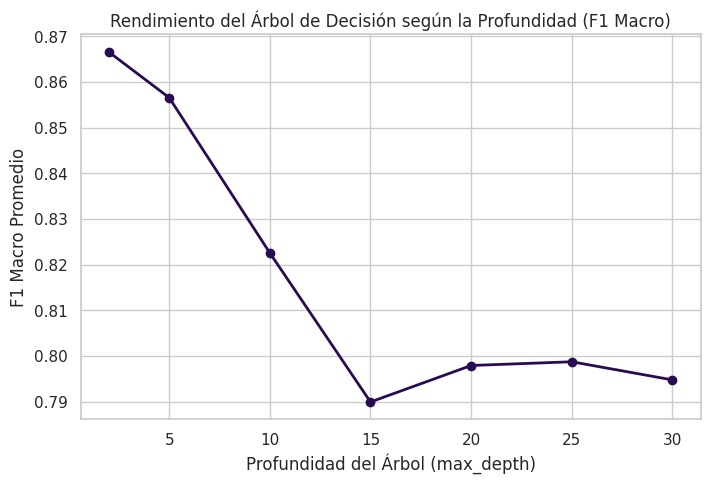

In [ ]:
# Se definen las profundidades que serán evaluadas.
profundidades = [2, 5, 10, 15, 20, 25, 30, None]

# Se inicializa el método de validación cruzada estratificada.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

# Se crean listas para almacenar los resultados de entrenamiento y prueba.
resultados_f1 = []

# Se separan las variables predictoras y la variable objetivo.
X = df.drop(columns=["Grade"])
y = df["Grade"]

# Se evalúa el rendimiento para cada valor de profundidad.
for profundidad in profundidades:

    # Se crea el modelo de Árbol de Decisión con la profundidad actual.
    modelo = DecisionTreeClassifier(max_depth=profundidad, random_state=7)

    # Se calcula el F1 Macro promedio con validación cruzada.
    f1_scores = cross_val_score(modelo, X, y, cv=skf, scoring="f1_macro", n_jobs=-1)

    # Se almacena el desempeño promedio.
    resultados_f1.append(f1_scores.mean())

# Se convierte la lista de resultados a un array para facilitar el manejo.
resultados_f1 = np.array(resultados_f1)

# Se genera la gráfica para visualizar el comportamiento del F1 Macro según la profundidad.
plt.figure(figsize=(8,5))
plt.plot(profundidades, resultados_f1, marker='o', color=color_principal, linewidth=2)

plt.title("Rendimiento del Árbol de Decisión según la Profundidad (F1 Macro)")
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("F1 Macro Promedio")
plt.grid(True)
plt.show()

**OBSERVACIONES PARTE 3:** Al evaluar el rendimiento del árbol de decisión con distintas profundidades, se observa que los valores más altos de F1 Macro se obtienen con árboles poco profundos, especialmente entre 2 y 5 niveles, lo que sugiere que la relación entre las características clínicas y genéticas del glioma puede capturarse de forma efectiva sin necesidad de modelos demasiado complejos. A medida que la profundidad aumenta, el rendimiento disminuye de forma notable, reflejando un posible sobreajuste donde el modelo empieza a memorizar patrones específicos de las mutaciones en lugar de generalizar adecuadamente el comportamiento real de los tumores. Este resultado es consistente con la naturaleza del dataset, donde algunas mutaciones clave como IDH1, ATRX y TP53 ya explican buena parte de la diferencia entre tumores de bajo y alto grado, por lo que árboles excesivamente profundos no aportan mayor valor y tienden a introducir ruido. En conjunto, la gráfica sugiere que una complejidad moderada permite capturar mejor los patrones clínicos relevantes sin perder capacidad de generalización.

### **4. Optimización de hiperparámetros con RandomizedSearchCV**

- Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- n_iter = 5 (combinaciones aleatorias a buscar)
- n_jobs = -1 para acelerar cómputo
- Métrica de evaluación: f1 Macro
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [ ]:
# Se define el espacio de búsqueda para los hiperparámetros del árbol de decisión.
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),          # Profundidades de 5 a 50.
    "min_samples_split": list(range(2, 21))   # Valores de 2 a 20.
}

# Se crea el modelo base de Árbol de Decisión.
modelo_base = DecisionTreeClassifier(random_state=7)

# Se define la validación cruzada estratificada con 10 particiones.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

# Se configura RandomizedSearchCV con el espacio de búsqueda y la métrica F1 Macro.
random_search = RandomizedSearchCV(
    estimator=modelo_base,
    param_distributions=param_dist,
    n_iter=5,                 # Número de combinaciones aleatorias a evaluar.
    scoring="f1_macro",       # Métrica de evaluación.
    cv=skf,                   # Esquema de validación cruzada estratificada.
    n_jobs=-1,                # Se utilizan todos los núcleos disponibles para acelerar el cómputo.
    random_state=7            # Se fija la semilla para reproducibilidad.
)

# Se ajusta RandomizedSearchCV utilizando todo el conjunto de datos.
random_search.fit(X, y)

# Se imprimen los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros encontrados (RandomizedSearchCV - F1 Macro):")
print(random_search.best_params_)

# Se imprime el mejor puntaje promedio obtenido durante la búsqueda.
print("\nMejor puntaje F1 Macro promedio:")
print(random_search.best_score_)

Mejores hiperparámetros encontrados (RandomizedSearchCV - F1 Macro):
{'min_samples_split': 9, 'max_depth': 43, 'criterion': 'entropy'}

Mejor puntaje F1 Macro promedio:
0.824389460480314


**OBSERVACIONES PARTE 4:** Al aplicar la búsqueda aleatoria de hiperparámetros, se identifica que la mejor combinación para maximizar el F1 Macro incluye un árbol relativamente profundo (max_depth = 43), con el criterio entropy y un valor moderado de min_samples_split = 9, lo cual sugiere que el modelo requiere cierta complejidad para capturar las interacciones entre las múltiples mutaciones genéticas presentes en el dataset. A diferencia de la evaluación previa donde los árboles poco profundos ofrecían el mejor desempeño general, en esta búsqueda el algoritmo explora configuraciones más amplias y encuentra que una mayor profundidad permite dividir mejor a los pacientes según patrones de mutaciones asociadas al grado del glioma. Este resultado refleja que las características genéticas como IDH1, TP53, ATRX y otras presentes en el dataset pueden generar interacciones no lineales que requieren mayor flexibilidad del modelo. Sin embargo, el F1 Macro alcanzado indica que, aunque el árbol profundo logra un buen equilibrio entre ambas clases, sigue siendo importante evaluar si esta complejidad adicional se mantiene como óptima cuando se explora el espacio completo con GridSearchCV.

### **5. Optimización de hiperparámetros con GridSearchCV**

- Define el espacio de búsqueda  para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- Métrica de evaluación: f1 Macro
- n_jobs = -1 para acelerar cómputo
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [ ]:
# Se define el espacio completo de búsqueda para los hiperparámetros.
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),          # Profundidades de 5 a 50.
    "min_samples_split": list(range(2, 21))   # Valores de 2 a 20.
}

# Se crea el modelo base de Árbol de Decisión.
modelo_base = DecisionTreeClassifier(random_state=7)

# Se define la validación cruzada estratificada con 10 particiones.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

# Se configura GridSearchCV con el espacio completo de búsqueda.
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring="f1_macro",   # Métrica de evaluación.
    cv=skf,               # Esquema de validación cruzada estratificada.
    n_jobs=-1             # Se utilizan todos los núcleos disponibles.
)

# Se ajusta GridSearchCV utilizando todo el conjunto de datos.
grid_search.fit(X, y)

# Se imprimen los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros encontrados (GridSearchCV - F1 Macro):")
print(grid_search.best_params_)

# Se imprime el mejor puntaje promedio obtenido durante la búsqueda.
print("\nMejor puntaje F1 Macro promedio:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados (GridSearchCV - F1 Macro):
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 13}

Mejor puntaje F1 Macro promedio:
0.8651160144238152


**OBSERVACIONES PARTE 5:** Al realizar la búsqueda exhaustiva con GridSearchCV, se identifica que la mejor configuración utiliza el criterio entropy, una profundidad moderada de 6 niveles y un valor de min_samples_split = 13, lo que refleja que el modelo obtiene su mejor desempeño cuando mantiene un equilibrio entre simplicidad y capacidad de capturar patrones relevantes en las mutaciones genéticas. A diferencia de RandomizedSearchCV, que sugería un árbol mucho más profundo, la búsqueda completa confirma que no es necesaria una estructura compleja para separar los tumores de bajo y alto grado, ya que mutaciones clave como IDH1, ATRX y TP53, junto con la edad al diagnóstico, ya proporcionan señales suficientemente fuertes para la clasificación. El aumento del F1 Macro obtenido con esta configuración sugiere que un árbol más controlado evita el sobreajuste y generaliza mejor en un contexto clínico donde los patrones verdaderos deben prevalecer sobre el ruido característico de datos biológicos.

### **6. Optimización de hiperparámetros con RandomizedSearchCV: Accuracy**

- Define el espacio de búsqueda aleatorio para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- n_iter = 5 (combinaciones aleatorias a buscar)
- n_jobs = -1 para acelerar cómputo
- Métrica de evaluación: accuracy
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [ ]:
# Se define el espacio de búsqueda para los hiperparámetros del árbol de decisión.
param_dist_acc = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),          # Profundidades de 5 a 50.
    "min_samples_split": list(range(2, 21))   # Valores de 2 a 20.
}

# Se crea el modelo base de Árbol de Decisión.
modelo_base_acc = DecisionTreeClassifier(random_state=7)

# Se define la validación cruzada estratificada con 10 particiones.
skf_acc = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

# Se configura RandomizedSearchCV con el espacio de búsqueda y la métrica accuracy.
random_search_acc = RandomizedSearchCV(
    estimator=modelo_base_acc,
    param_distributions=param_dist_acc,
    n_iter=5,                 # Número de combinaciones aleatorias a evaluar.
    scoring="accuracy",       # Métrica de evaluación: accuracy.
    cv=skf_acc,               # Esquema de validación cruzada estratificada.
    n_jobs=-1,                # Se utilizan todos los núcleos disponibles.
    random_state=7            # Se fija la semilla para reproducibilidad.
)

# Se ajusta RandomizedSearchCV utilizando todo el conjunto de datos.
random_search_acc.fit(X, y)

# Se imprimen los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros encontrados (RandomizedSearchCV - Accuracy):")
print(random_search_acc.best_params_)

# Se imprime el mejor puntaje promedio obtenido durante la búsqueda.
print("\nMejor puntaje Accuracy promedio:")
print(random_search_acc.best_score_)

Mejores hiperparámetros encontrados (RandomizedSearchCV - Accuracy):
{'min_samples_split': 9, 'max_depth': 43, 'criterion': 'entropy'}

Mejor puntaje Accuracy promedio:
0.8307085484796326


**OBSERVACIONES PARTE 6:** Al aplicar RandomizedSearchCV utilizando accuracy como métrica, se identifica nuevamente que la mejor combinación de hiperparámetros corresponde a un árbol profundo (max_depth = 43), con el criterio entropy y un valor de min_samples_split = 9, lo cual coincide exactamente con los resultados obtenidos previamente con F1 Macro. Este resultado refleja que, dado el ligero desbalance entre tumores de bajo y alto grado, la métrica accuracy no penaliza en exceso los errores en la clase minoritaria, por lo que el modelo favorece una estructura más compleja capaz de capturar variaciones sutiles en las mutaciones genéticas. En un contexto clínico, esto sugiere que la presencia de múltiples genes alterados —como TP53, ATRX, EGFR o MUC16— genera interacciones que el árbol profundo puede aprovechar para distinguir correctamente a la mayoría de los pacientes. Sin embargo, el hecho de que accuracy favorezca la misma profundidad extrema subraya la necesidad de comparar estos resultados con F1 Macro, ya que un buen desempeño global no siempre implica un equilibrio adecuado en ambas clases diagnósticas.

### **7. Optimización de hiperparámetros con GridSearchCV: accuracy**

- Define el espacio de búsqueda  para los siguientes hiperpárametros:
  - Criterion = gini ,entropy
  - max_depth: de 5 a 50 con incrementos de 1
  - min_samples_split: de 2 a 20 con incrementos de 1
- Usa el árbol de decisión
- StratifiedKfold = 10 (no deberás realizar ninguna partición previa: realiza el ejercicio considerando que es un conjunto de tamaño medio)
- Métrica de evaluación: f1 Macro
- n_jobs = -1 para acelerar cómputo
- Imprime los mejores hiperparámetros encontrados
- Imprime el best_score

In [ ]:
# Se define el espacio completo de búsqueda para los hiperparámetros.
param_grid_acc = {
    "criterion": ["gini", "entropy"],
    "max_depth": list(range(5, 51)),          # Profundidades de 5 a 50.
    "min_samples_split": list(range(2, 21))   # Valores de 2 a 20.
}

# Se crea el modelo base de Árbol de Decisión.
modelo_base_acc_grid = DecisionTreeClassifier(random_state=7)

# Se define la validación cruzada estratificada con 10 particiones.
skf_acc_grid = StratifiedKFold(n_splits=10, shuffle=True, random_state=3)

# Se configura GridSearchCV con el espacio de búsqueda y la métrica accuracy.
grid_search_acc = GridSearchCV(
    estimator=modelo_base_acc_grid,
    param_grid=param_grid_acc,
    scoring="accuracy",   # Métrica de evaluación: accuracy.
    cv=skf_acc_grid,      # Esquema de validación cruzada estratificada.
    n_jobs=-1             # Se utilizan todos los núcleos disponibles.
)

# Se ajusta GridSearchCV utilizando todo el conjunto de datos.
grid_search_acc.fit(X, y)

# Se imprimen los mejores hiperparámetros encontrados.
print("Mejores hiperparámetros encontrados (GridSearchCV - Accuracy):")
print(grid_search_acc.best_params_)

# Se imprime el mejor puntaje promedio obtenido durante la búsqueda.
print("\nMejor puntaje Accuracy promedio:")
print(grid_search_acc.best_score_)

Mejores hiperparámetros encontrados (GridSearchCV - Accuracy):
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 13}

Mejor puntaje Accuracy promedio:
0.8664515203671831


**OBSERVACIONES PARTE 7:** Al ejecutar la búsqueda exhaustiva con GridSearchCV utilizando accuracy como métrica, se identifica que el mejor modelo corresponde a un árbol con profundidad baja (max_depth = 5), criterio entropy y un valor de min_samples_split = 13, lo cual indica que la clasificación correcta de la mayoría de los pacientes no requiere una estructura compleja. Este resultado es coherente con la naturaleza biológica del dataset, donde ciertas mutaciones como IDH1 y ATRX, así como la edad al diagnóstico, separan de forma clara a los tumores de bajo y alto grado, permitiendo que un árbol relativamente simple capture los patrones generales sin caer en sobreajuste. El hecho de que accuracy favorezca un modelo más simple que el propuesto por RandomizedSearchCV demuestra que, cuando se evalúa principalmente el desempeño global, el algoritmo tiende a priorizar configuraciones que funcionan bien para la clase mayoritaria sin necesidad de modelar variaciones más finas entre mutaciones menos frecuentes. En conjunto, este resultado refuerza la importancia de comparar diferentes métricas según el objetivo clínico del modelo, ya que cada una resalta distintos aspectos del comportamiento del clasificador.

### **8.Actividad de reflexión y análisis**

- ¿Cuál método encontró mejores hiperparámetros?
- ¿Cuál fue más costoso computacionalmente?
- ¿Los resultados en f1_macro set fueron distintos en ambos métodos de optimización? ¿Por qué?
- ¿Los resultados en accuracy set fueron distintos en ambos métodos de optimización? ¿Por qué?
- ¿Los valores de hiperpárametros fueron iguales en Accuracy y F1 Macro ?

**OBSERVACIONES PARTE 8:** Al comparar los métodos de optimización, se observa que GridSearchCV encuentra los mejores hiperparámetros tanto para F1 Macro como para accuracy, ya que explora todas las combinaciones posibles y logra identificar configuraciones más equilibradas para este tipo de datos clínicos y genéticos. También se confirma que GridSearchCV es más costoso computacionalmente, mientras que RandomizedSearchCV ofrece resultados razonables con menos esfuerzo. En cuanto a las métricas, se nota que F1 Macro y accuracy llevan a profundidades distintas, porque cada una evalúa el modelo desde una perspectiva diferente: F1 Macro busca equilibrio entre ambos grados del tumor, mientras que accuracy se enfoca en el desempeño global, favoreciendo modelos más simples. Por ello, los hiperparámetros no son iguales en ambas métricas; F1 Macro tiende a seleccionar configuraciones que capturan mejor las diferencias entre mutaciones clave, mientras que accuracy prioriza un modelo que clasifica bien a la mayoría de los pacientes sin necesidad de una estructura muy profunda. En conjunto, esto muestra la importancia de elegir la métrica adecuada según el objetivo clínico del modelo.